<a href="https://colab.research.google.com/github/Ashrithajangam/IT7133-FALL24/blob/main/Model_Development_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mount Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Upload and Load Data**

In [8]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

data_path = 'insurance.csv'
data = pd.read_csv(data_path)
data.head()

Saving insurance.csv to insurance (1).csv


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **Train-Test Split**

In [9]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

train_data.head()

,age,sex,bmi,children,smoker,region,charges
560,46,female,19.95,2,no,northwest,9193.83850
1285,47,female,24.32,0,no,northeast,8534.67180
1142,52,female,24.86,0,no,southeast,27117.99378
969,39,female,34.32,5,no,southeast,8596.82780
486,54,female,21.47,3,no,northwest,12475.35130


# **Define Numeric and Categorical Columns**

In [10]:
num_cols = ['age', 'bmi', 'children']  # Numeric columns
cat_cols = ['sex', 'smoker', 'region'] # Categorical columns

# **Data Visualizationa**

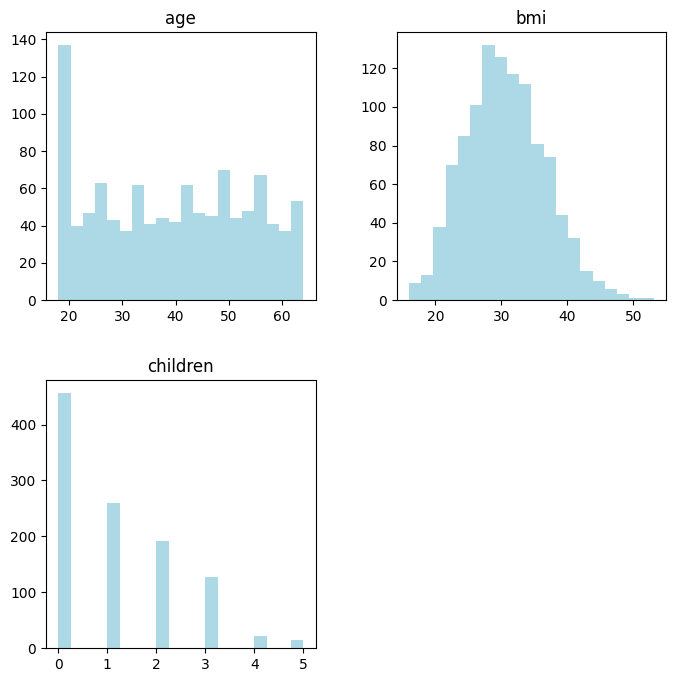

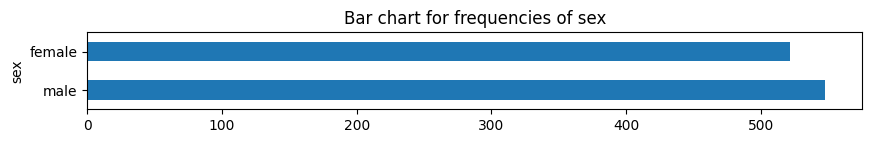

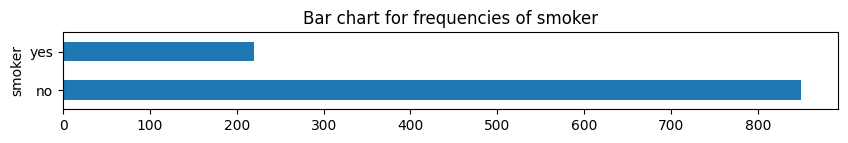

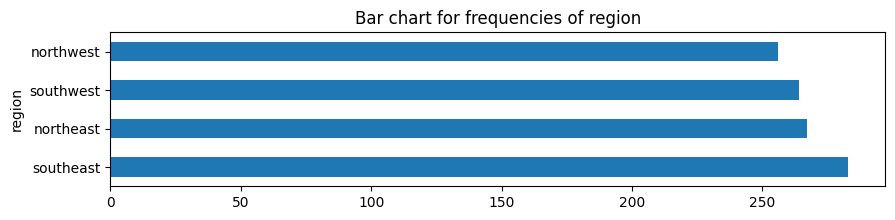

In [11]:
# Step 6: Visualize Histograms for Numeric Columns
import matplotlib.pyplot as plt
train_data[num_cols].hist(bins=20, figsize=(8,8), color='lightblue', grid=False)
plt.show()

# Step 7: Bar charts for Categorical Columns
for col in cat_cols:
    freq_table = train_data[col].value_counts()
    plt.figure(figsize=(10,len(freq_table)*0.5))
    freq_table.plot.barh(title='Bar chart for frequencies of ' + col)
    plt.show()


# **Data Pipeline Setup**

In [17]:
log_cols = ['bmi']  # Log transformation for skewed columns
target = 'charges'  # Target column

from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Numeric pipeline
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('standardize', StandardScaler())
])

# Log transformation pipeline
def log_transformation(x):
    return np.log(x + 0.01)

log_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('log transform', FunctionTransformer(log_transformation)),
    ('standardize', StandardScaler())
])

# Complete processing pipeline
processing_pipeline = ColumnTransformer([
    ('numeric', num_pipeline, num_cols),
    ('log', log_pipeline, log_cols),
    ('class', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# Fit the pipeline
processing_pipeline.fit(train_data)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['age', 'bmi', 'children']),
                                ('log',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('log transform',
                                                  FunctionTransformer(func=<function log_transformation at 0x7e8dfd474040>)),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['bmi']),
                                ('class',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

# **Transform Data for Model**

In [18]:
trainX = processing_pipeline.transform(train_data)
trainY = train_data[target]
testX = processing_pipeline.transform(test_data)
testY = test_data[target]

# **Save the Processing Pipeline**

In [20]:
pipeline_save_path = '/content/drive/MyDrive/Model/saved_pipeline.pkl'

import joblib
joblib.dump(processing_pipeline, pipeline_save_path)
print(f'Processing pipeline saved at {pipeline_save_path}')

Processing pipeline saved at /content/drive/MyDrive/Model/saved_pipeline.pkl


# **Neural Network Model Training**

In [22]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Input

num_layers = 5
num_iters = 500
learning_rate = 0.001

neural_net = Sequential()
neural_net.add(Input(shape=(trainX.shape[1],)))
for _ in range(num_layers):
    neural_net.add(Dense(trainX.shape[1], activation='relu'))
neural_net.add(Dense(1))

# Compile the model
neural_net.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')

# Train the model
neural_net.fit(trainX, trainY, epochs=num_iters, batch_size=int(trainX.shape[0]//10), validation_split=0.2)

Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 314100992.0000 - val_loss: 310373056.0000
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 336935488.0000 - val_loss: 310369888.0000
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 318176640.0000 - val_loss: 310367456.0000
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 342757280.0000 - val_loss: 310365472.0000
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 304038048.0000 - val_loss: 310363424.0000
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 310785600.0000 - val_loss: 310360608.0000
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 332802144.0000 - val_loss: 310356416.0000
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 325734624.0000 - val_loss: 310349888.0000
Epoch 9/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 357901152.0000 - val_loss: 310339232.0000
Epoch 10/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 310209600.0000 - val_loss: 310322176.0000
Epoch 1

# **Model Evaluation**

In [24]:
mse = neural_net.evaluate(testX, testY)
print(f'Mean Squared Error on Test Data: {mse}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE) on Test Data: {rmse}')

model_save_path = '/content/drive/MyDrive/Model/saved_neural_net_model.h5'
neural_net.save(model_save_path)
print(f'Model saved at {model_save_path}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18008056.0000


Mean Squared Error on Test Data: 18895836.0
Root Mean Squared Error (RMSE) on Test Data: 4346.934091977931
Model saved at /content/drive/MyDrive/Model/saved_neural_net_model.h5
